# Задание
1. https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

2. https://docs.opencv.org/4.x/dd/dd7/tutorial_morph_lines_detection.html

Здесь не нужно устанавливать библиотеку pytesseract так же удалить её использование из кода

3. https://ajlearn.net/opencv_textline_extraction_recognition

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# pt1

In [31]:
def snow_image(img):
    plt.figure(figsize=(8, 8))  # Опционально: задаём размер окна
    plt.imshow(img, cmap='gray')  # cmap='gray' для отображения в градациях серого
    plt.axis('off')  # Убираем оси для более чистого отображения
    plt.show()  # Отображаем изображение

def snow_image(title, img):
    plt.figure(figsize=(8, 8))  # Опционально: задаём размер окна
    plt.imshow(img, cmap='gray')  # cmap='gray' для отображения в градациях серого
    plt.title(title)  # Устанавливаем заголовок
    plt.axis('off')  # Убираем оси для более чистого отображения
    plt.show()  # Отображаем изображение
   
    
def sravnenie(img1, img2):
    combined_image = np.hstack((img1, img2))
    # cv.imshow('img', combined_image) # выводим итоговое изображение в окно

    # cv.waitKey()
    # cv.destroyAllWindows()
    
    plt.imshow(combined_image, cmap='gray')
    plt.axis('off')
    plt.show()

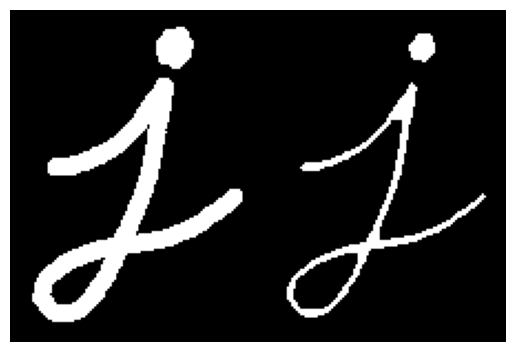

In [32]:
img = cv.imread('resources/lab5/image.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
combined_image = np.hstack((img, erosion))


plt.imshow(combined_image, cmap='gray')
plt.axis('off')
plt.show()

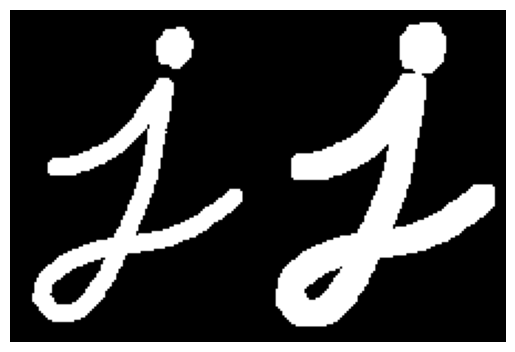

In [36]:
dilation = cv.dilate(img,kernel,iterations = 1)
combined_image = np.hstack((img, dilation))

plt.imshow(combined_image, cmap='gray')
plt.axis('off')
plt.show()

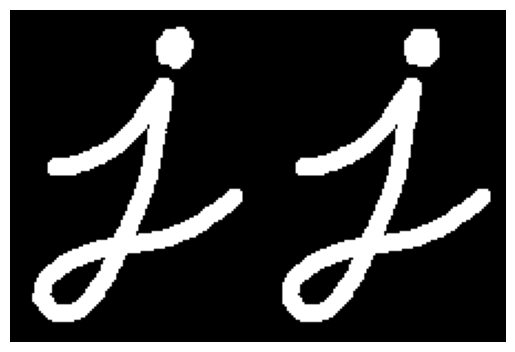

In [37]:
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
combined_image = np.hstack((img, opening))

plt.imshow(combined_image, cmap='gray')
plt.axis('off')
plt.show()

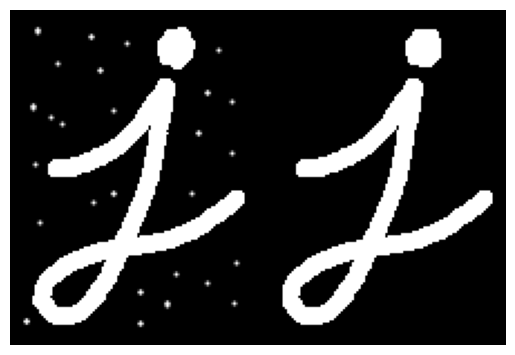

In [38]:
img3 = cv.imread('resources/lab5/img3.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel3 = np.ones((5,5),np.uint8)
erosion3 = cv.erode(img3,kernel3,iterations = 1)

opening = cv.morphologyEx(img3, cv.MORPH_OPEN, kernel3)
sravnenie(img3, opening)

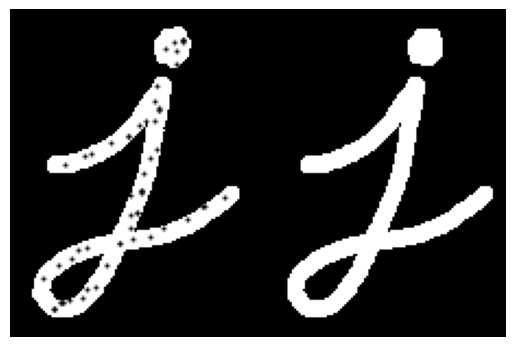

In [39]:
img4 = cv.imread('resources/lab5/img4.png', cv.IMREAD_GRAYSCALE)

closing = cv.morphologyEx(img4, cv.MORPH_CLOSE, kernel)
sravnenie(img4, opening)

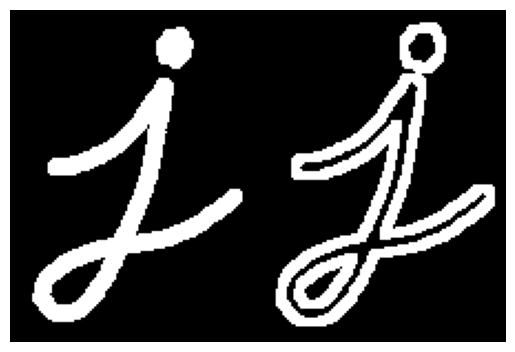

In [40]:
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
sravnenie(img, gradient)

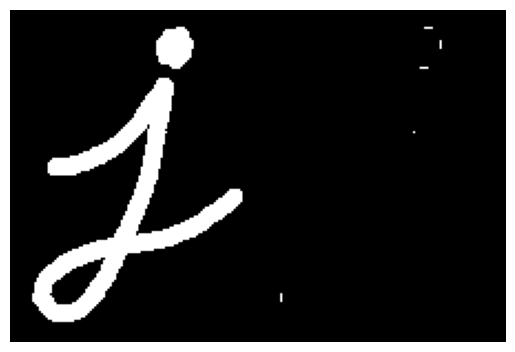

In [41]:
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
sravnenie(img, tophat)


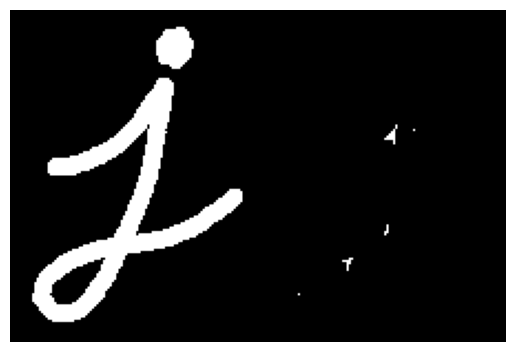

In [42]:
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
sravnenie(img, blackhat)


# pt2

In [43]:
img = cv.imread('resources/lab5/src.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"


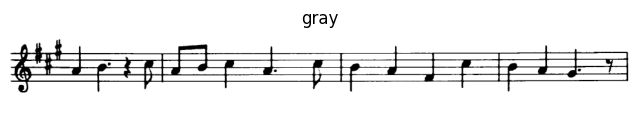

In [44]:
# Transform source image to gray if it is not already
if len(img.shape) != 2:
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
else:
    gray = img
 
    # Show gray image
snow_image("gray", gray)

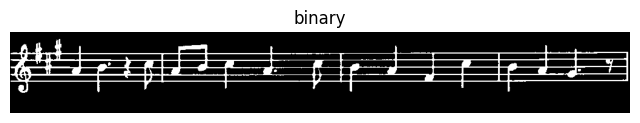

In [45]:
# Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
gray = cv.bitwise_not(gray)
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, -2)
# Show binary image
snow_image("binary", bw)

In [46]:
horizontal = np.copy(bw)
vertical = np.copy(bw)

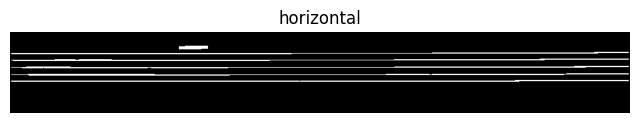

In [47]:
# Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols // 30

# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))

# Apply morphology operations
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)

# Show extracted horizontal lines
snow_image("horizontal", horizontal)

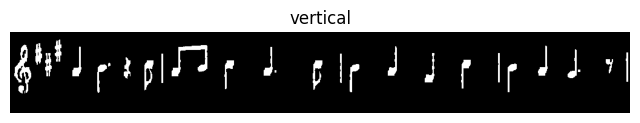

In [48]:
 # Specify size on vertical axis
rows = vertical.shape[0]
verticalsize = rows // 30

# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))

# Apply morphology operations
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)

# Show extracted vertical lines
snow_image("vertical", vertical)

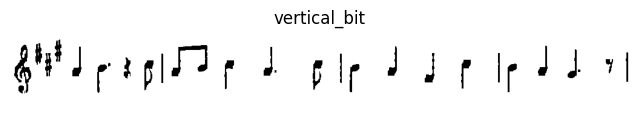

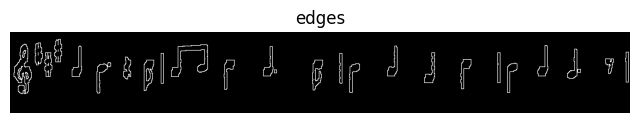

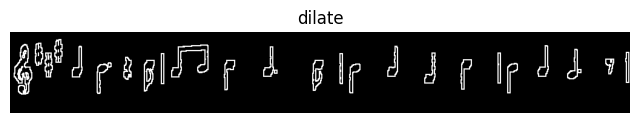

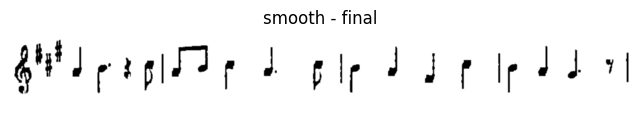

In [49]:
# Inverse vertical image
vertical = cv.bitwise_not(vertical)
snow_image("vertical_bit", vertical)
 
'''
    Extract edges and smooth image according to the logic
    1. extract edges
    2. dilate(edges)
    3. src.copyTo(smooth)
    4. blur smooth img
    5. smooth.copyTo(src, edges)
'''
 
# Step 1
edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 3, -2)
snow_image("edges", edges)
 
# Step 2
kernel = np.ones((2, 2), np.uint8)
edges = cv.dilate(edges, kernel)
snow_image("dilate", edges)
 
# Step 3
smooth = np.copy(vertical)
 
# Step 4
smooth = cv.blur(smooth, (2, 2))
 
# Step 5
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]
 
# Show final result
snow_image("smooth - final", vertical)

# pt3

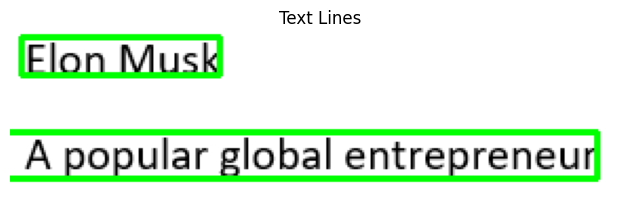

In [50]:
import cv2

import numpy as np
# Step 1: Load the image
image_path = r'resources/lab5/text_mask_eng.png'
image = cv2.imread(image_path)

# Check if the image is None
if image is None:
    raise ValueError("Invalid image file or path.")
    
# Step 2: Preprocess the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3, 3), 0)
bw = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# selected a kernel with more width so that we want to connect lines
kernel_size = (15, 1) 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# Step 3: Perform the closing operation: Dilate and then close
bw_closed = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

# Find contours for each text line
contours, _ = cv2.findContours(bw_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours to select those whose width is at least 3 times its height
filtered_contours = [cnt for cnt in contours if (cv2.boundingRect(cnt)[2] / cv2.boundingRect(cnt)[3])>=3.0]

# Sort contours based on y-coordinate
sorted_contours = sorted(filtered_contours, key=lambda contour: cv2.boundingRect(contour)[1])

padding=3
for contour in sorted_contours:
    x, y, w, h = cv2.boundingRect(contour)
    x, y, w, h = (x-padding, y-padding, w+padding, h+padding) 
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Recognize each line. Crop the image for each line and pass to OCR engine.
    line_image = image[y:y + h, x:x+w]


snow_image('Text Lines', image)